In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Text(0.5, 0, 'Y')

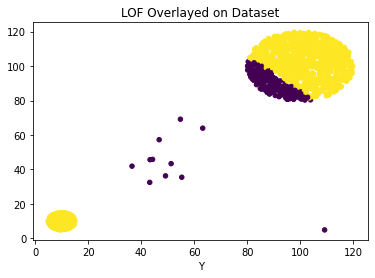

In [47]:
data = pd.read_csv('data/data.csv', names=["x","y"])
results = pd.read_csv('data/results/lof.txt/part-00000', names=["index1","LRD"])
data['index1'] = data.index
merged = pd.merge(data,results,on="index1")
merged['index1']
merged.LRD = 1/merged.LRD
merged['LRD'] = np.where(1/merged['LRD'] > .95, 1.0, 0.0)
fig = plt.scatter(merged.x,merged.y, s=20, c=merged.LRD)
plt.title("LOF Overlayed on Dataset")
plt.xlabel("X")
plt.xlabel("Y")

In [34]:
merged.loc[(merged.LRD<.9)]

,x,y,index1,LRD


In [32]:
merged.loc[(merged.y <20) & (merged.x<20)]

,x,y,index1,LRD
0,9.616232,6.821204,0,0.980652
1,10.757276,12.782887,1,1.002547
2,10.383064,9.921313,2,0.992502
3,14.721831,8.904125,3,1.002506
4,14.576181,8.423416,4,1.000507
...,...,...,...,...
995,10.905605,9.312742,995,0.992211
996,8.147744,6.030030,996,0.973930
997,8.788792,7.683682,997,0.980820
998,5.957744,12.059160,998,0.985229


In [19]:
merged.loc[(merged.y >80) & (merged.x>80)]

,x,y,index1,LRD
1000,87.008200,109.825227,1000,0.863902
1001,99.155332,101.572491,1001,0.873125
1002,108.162397,85.742473,1002,0.857031
1003,85.855767,105.118128,1003,0.840425
1004,88.939851,84.506341,1004,0.771058
...,...,...,...,...
1995,84.412751,109.965901,1995,0.856186
1996,102.113583,98.761429,1996,0.873982
1997,94.508977,81.555815,1997,0.783507
1998,94.421209,105.184569,1998,0.869995


Text(0.5, 1.0, 'LOF Overlayed on Dataset')

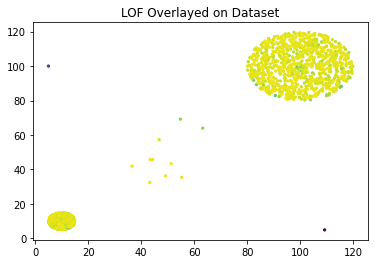

In [44]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=5)
data2 = data.copy().append({'x':5,'y':100}, ignore_index=True)
clf.fit_predict(data2[["x","y"]].to_numpy())
data2["LOF"] = clf.negative_outlier_factor_ 
fig = plt.scatter(data2.x,data2.y, s=5, c=data2.LOF)
plt.title("LOF Overlayed on Dataset")

In [30]:
 clf.negative_outlier_factor_ > 1.2

array([False, False, False, ..., False, False, False])

In [45]:
groups = merged1.groupby('LRD')
for name, group in groups:
    plt.plot(group.x, group.y, marker='o', linestyle='', markersize=12, label=name)

NameError: name 'merged1' is not defined

In [89]:
merged

,x,y,LRD
0,9.616232,6.821204,False
1,10.757276,12.782887,False
2,10.383064,9.921313,False
3,14.721831,8.904125,False
4,14.576181,8.423416,False
...,...,...,...
2005,43.330490,45.680367,False
2006,36.533063,41.937020,False
2007,49.164949,36.293804,False
2008,51.274593,43.378843,False


In [11]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=30, contamination=.1)
y_pred = clf.fit_predict(data)
LOF_Scores = clf.negative_outlier_factor_
LOF_pred=pd.Series(y_pred).replace([-1,1],[1,0])
LOF_anomalies=data[LOF_pred==1]

In [25]:
data2 = data.copy()
data2['lof'] = LOF_Scores.tolist()
data2

,x,y,index1,lof
0,9.616232,6.821204,0,-1.228322
1,10.757276,12.782887,1,-1.200333
2,10.383064,9.921313,2,-1.175099
3,14.721831,8.904125,3,-1.172529
4,14.576181,8.423416,4,-1.153459
...,...,...,...,...
2005,43.330490,45.680367,2005,-2.194854
2006,36.533063,41.937020,2006,-2.338549
2007,49.164949,36.293804,2007,-2.260249
2008,51.274593,43.378843,2008,-2.144096


Text(0.5, 0, 'Y')

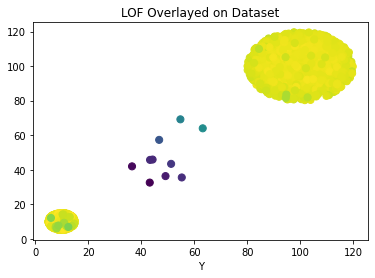

In [27]:
fig = plt.scatter(data2.x,data2.y, s=50, c=data2.lof)
plt.title("LOF Overlayed on Dataset")
plt.xlabel("X")
plt.xlabel("Y")